# Pairs Trading for Indian Stocks with various clustering methods

### 1. Loading python packages

In [112]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing

from statsmodels.tsa.stattools import coint

from scipy import stats
import yfinance as yf

### 2. Loading data for NIFTY 100 stocks

In [22]:
tickers = ["ABB.NS", "ADANIENT.NS", "ADANIPOWER.NS", "AMBUJACEM.NS", "APOLLOHOSP.NS", "ASIANPAINT.NS", "AXISBANK.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS", "BAJAJHLDNG.NS",
           "BPCL.NS", "BHARTIARTL.NS", "BHEL.NS", "BEL.NS", "BANKBARODA.NS", "BOSCHLTD.NS", "BRITANNIA.NS", "ZYDUSLIFE.NS", "CANBK.NS", "CHOLAFIN.NS", "CIPLA.NS", "COALINDIA.NS", 
           "DABUR.NS", "DIVISLAB.NS", "DLF.NS", "DRREDDY.NS", "EICHERMOT.NS", "GAIL.NS", "GODREJCP.NS", "GRASIM.NS", "HAVELLS.NS", "HCLTECH.NS", "HDFCBANK.NS", "HEROMOTOCO.NS",
           "HINDUNILVR.NS", "HINDALCO.NS", "IOC.NS", "ICICIBANK.NS", "INDUSINDBK.NS", "NAUKRI.NS", "INFY.NS", "ITC.NS", "JSWSTEEL.NS", "JINDALSTEL.NS", "JSWENERGY.NS", "KOTAKBANK.NS",
           "LT.NS", "M&M.NS", "MARUTI.NS", "MOTHERSON.NS", "ADANIPORTS.NS", "NTPC.NS", "NHPC.NS", "ONGC.NS", "PIDILITIND.NS", "PFC.NS", "POWERGRID.NS", "PNB.NS", "RELIANCE.NS", "RECLTD.NS",
           "SBIN.NS", "VEDL.NS", "SHREECEM.NS", "SHRIRAMFIN.NS", "SIEMENS.NS", "SUNPHARMA.NS", "TCS.NS", "TATACONSUM.NS", "TATAMOTORS.NS", "TATAPOWER.NS", "TATASTEEL.NS", "TECHM.NS",
           "TITAN.NS", "TORNTPHARM.NS", "TRENT.NS", "TVSMOTOR.NS", "ULTRACEMCO.NS", "UNIONBANK.NS", "UNITDSPR.NS", "WIPRO.NS", "NESTLEIND.NS", "ADANIENSOL.NS", "INDIGO.NS", "LTIM.NS",
           "ICICIPRULI.NS", "VBL.NS", "DMART.NS", "ICICIGI.NS", "SBILIFE.NS", "HDFCLIFE.NS", "HAL.NS", "ADANIGREEN.NS", "ATGL.NS", "IRCTC.NS", "IRFC.NS", "LODHA.NS", "ZOMATO.NS", "LICI.NS",
           "JIOFIN.NS"      
 ]

# Define the date range (update for current data)
start_date = "2019-01-01"
end_date = "2023-12-31"

# Fetch the data
data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]

# Save to CSV
data.to_csv("NSE_Current_Closing_Prices_new.csv")

print("Data saved to NSE_Current_Closing_Prices_new.csv")



1 Failed download:
['UNITDSPR.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1546281000, endDate = 1703961000")')


Data saved to NSE_Current_Closing_Prices_new.csv


In [23]:
import pandas as pd
dataset = pd.read_csv(r'C:\Users\Shruti\Desktop\ML projects\NSE_Current_Closing_Prices_new.csv', index_col=0)

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
type(dataset)

pandas.core.frame.DataFrame

## Data Analysis

### Checking the dataset extracted

In [26]:
# shape
dataset.shape

(1235, 100)

In [27]:
# peek at data
pd.set_option('display.width', 100)
dataset.head(5)

,ABB.NS,ADANIENSOL.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANIPOWER.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,ATGL.NS,...,TRENT.NS,TVSMOTOR.NS,ULTRACEMCO.NS,UNIONBANK.NS,UNITDSPR.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1155.927490,NaN,155.247116,41.400002,375.101196,50.849998,198.539246,1243.499268,1308.998657,101.294548,...,358.693420,546.822754,3903.288574,78.843819,NaN,46.754475,88.260170,119.087334,NaN,323.957977
2019-01-02,1155.971313,NaN,152.877701,41.150002,367.676270,50.549999,195.020966,1235.987793,1320.212769,99.902168,...,351.855499,518.442749,3900.270752,78.754524,NaN,45.624676,84.351547,118.686302,NaN,320.903900
2019-01-03,1146.946167,NaN,150.557632,40.950001,364.590668,50.349998,190.478333,1243.744873,1324.984863,100.299988,...,346.950012,520.961243,3797.022461,79.245628,NaN,45.911423,82.080650,118.668060,NaN,318.035065
2019-01-04,1142.302246,NaN,150.606995,40.549999,368.495941,50.049999,192.883270,1269.618408,1322.646484,100.299988,...,346.305878,523.963806,3811.139160,82.370804,NaN,46.301399,84.242378,118.285271,NaN,318.544006
2019-01-07,1140.681030,NaN,149.323563,41.099998,368.013824,50.349998,194.174774,1258.915405,1332.333618,101.095627,...,347.841919,517.958435,3823.017090,80.897507,NaN,46.550869,84.482590,118.212357,NaN,322.893677


In [30]:
# describe data
pd.set_option('display.float_format', '{:.3f}'.format)
dataset.describe()

,ABB.NS,ADANIENSOL.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANIPOWER.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,ATGL.NS,...,TRENT.NS,TVSMOTOR.NS,ULTRACEMCO.NS,UNIONBANK.NS,UNITDSPR.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZOMATO.NS,ZYDUSLIFE.NS
count,1235.000,92.000,1235.000,1235.000,1235.000,1235.000,1235.000,1235.000,1235.000,1235.000,...,1235.000,1235.000,1235.000,1235.000,0.000,1235.000,1235.000,1235.000,604.000,1235.000
mean,2067.786,859.255,1340.030,962.269,585.915,149.647,311.382,3182.705,2446.409,1041.405,...,992.013,721.790,5864.552,50.121,NaN,143.291,138.406,192.531,87.684,407.364
std,1115.144,118.232,1137.772,736.022,206.404,124.821,116.382,1503.342,707.955,1081.710,...,548.175,379.200,1679.272,23.196,NaN,108.044,71.993,65.329,31.862,123.788
min,709.541,718.900,115.460,30.250,202.696,25.650,125.003,1075.406,1244.911,81.431,...,319.301,247.752,2945.901,20.403,NaN,43.460,28.079,79.460,41.650,204.077
25%,1208.180,765.350,197.458,201.500,361.406,50.850,192.673,1457.459,1704.211,159.837,...,546.613,451.244,4146.019,31.609,NaN,59.989,67.352,133.151,61.800,320.200
50%,1681.629,827.650,1416.259,965.150,672.920,97.650,314.658,3552.437,2712.177,649.478,...,880.850,584.432,6235.360,41.877,NaN,99.160,137.289,195.091,77.625,398.868
75%,2875.074,879.375,2205.188,1347.700,745.121,255.850,397.526,4525.503,3071.030,1588.619,...,1314.439,1012.159,7225.639,67.632,NaN,211.386,207.786,217.881,118.225,490.905
max,4864.383,1198.700,4159.460,2970.500,1089.625,562.400,582.586,5746.476,3497.630,3916.354,...,3052.855,2040.682,10441.131,124.996,NaN,515.649,261.751,353.922,160.300,687.485


## Data Cleaning

We check for the NAs in the rows, either drop them or fill them with the mean of the column.

In [31]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Getting rid of the columns with more than 30% missing values and drop rows with null values

In [32]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(1235, 93)

In [33]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')
dataset.head(2)

,ABB.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANIPOWER.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,ATGL.NS,AXISBANK.NS,...,TITAN.NS,TORNTPHARM.NS,TRENT.NS,TVSMOTOR.NS,ULTRACEMCO.NS,UNIONBANK.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1155.927,155.247,41.400,375.101,50.850,198.539,1243.499,1308.999,101.295,623.804,...,898.259,830.811,358.693,546.823,3903.289,78.844,46.754,88.260,119.087,323.958
2019-01-02,1155.971,152.878,41.150,367.676,50.550,195.021,1235.988,1320.213,99.902,616.594,...,902.276,831.840,351.855,518.443,3900.271,78.755,45.625,84.352,118.686,320.904


## Data Transformation

For the purpose of clustering, we will be using annual returns and variance as the variables as they are the indicators of the stock performance and its volatility.

In [34]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = dataset.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dataset.pct_change().std() * np.sqrt(252)
data=returns
#format the data as a numpy array to feed into the K-Means algorithm
#data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

All the variables should be on the same scale before applying clustering, otherwise a feature with large values will dominate the result. We use StandardScaler in sklearn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)
# summarize transformed data
rescaledDataset.head(2)
X=rescaledDataset
X.head(2)

,Returns,Volatility
ABB.NS,0.335,-0.411
ADANIENT.NS,3.191,2.308


# Evaluate Algorithms and Models
##### We will look at the following models:
1.KMeans

2.Hierarchical Clustering (Agglomerative Clustering)

3.Affinity Propagation

## 2.1. K-Means Clustering

#### 2.1.1. Finding optimal number of clusters
In this step we look at the following metrices:
     
1.Sum of square errors (SSE) within clusters

2.Silhouette score

  File "C:\Users\Shruti\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Shruti\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Shruti\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 947, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Shruti\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 1416, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


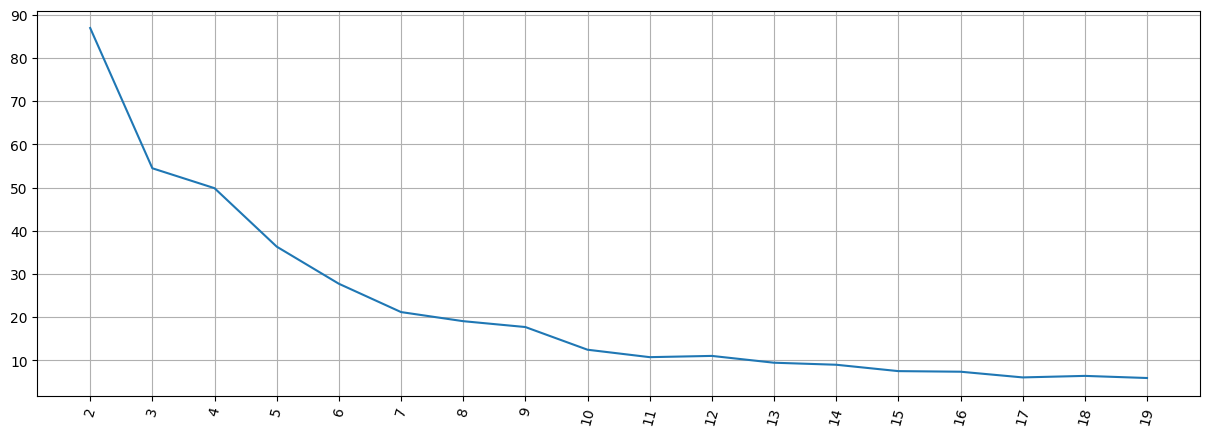

In [36]:
distorsions = []
max_loop=20
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

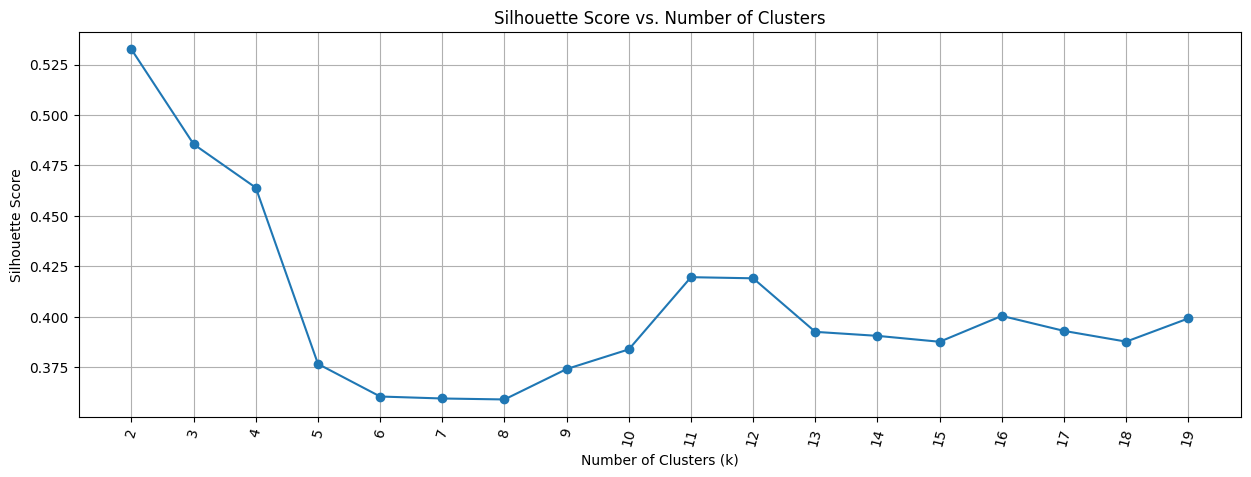

In [41]:
from sklearn import metrics

silhouette_scores = []
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, max_loop), rotation=75)
plt.grid(True)
plt.show()

## 2.1.2 Clustering and visualisation
Building the k-means model with 8 clusters and visualizing the results in a 2-D dimensional space


In [63]:
nclust=8

In [64]:
from sklearn.cluster import KMeans
#Fit with k-means
k_means = KMeans(n_clusters=nclust, random_state=10)
k_means.fit(X)

KMeans(random_state=10)

In [65]:
#Extracting labels 
target_labels = k_means.predict(X)

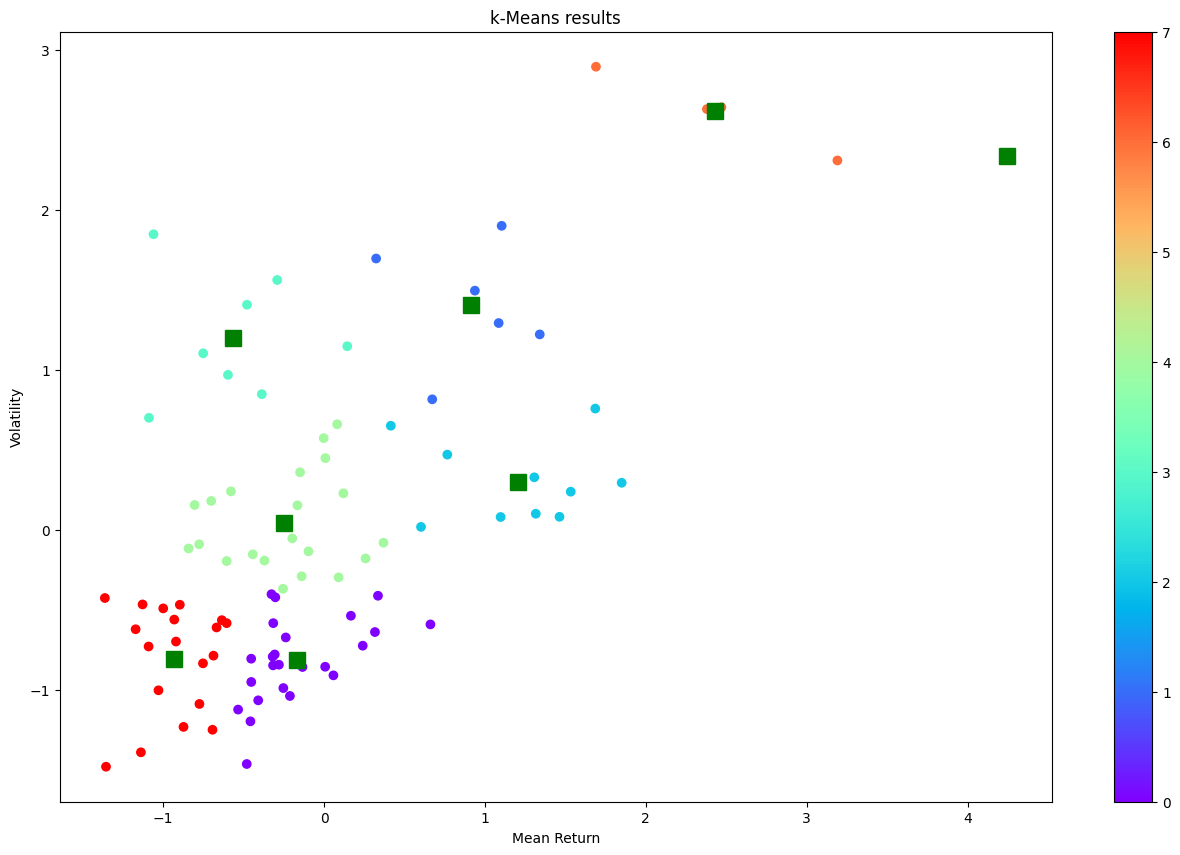

In [66]:
centroids = k_means.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = k_means.labels_, cmap ="rainbow", label = X.index)
ax.set_title('k-Means results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

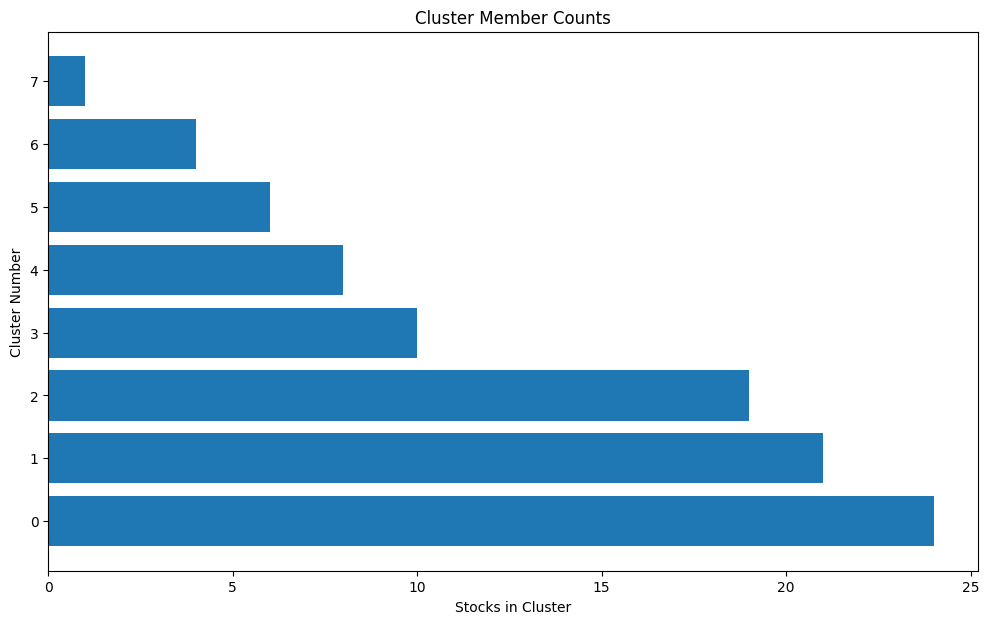

In [67]:
# show number of stocks in each cluster
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series.value_counts())), # cluster labels, y axis
    clustered_series.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

## 2.2 Hierarchical Clustering (Agglomerative Clustering)

### 5.2.1. Building Hierarchy Graph/ Dendogram
The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

#Calulate linkage
Z= linkage(X, method='ward')
Z[0]

array([4.7000000e+01, 8.7000000e+01, 1.8639471e-02, 2.0000000e+00])

The best way to visualize an agglomerate clustering algorithm is through a dendogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. The "distance" between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.

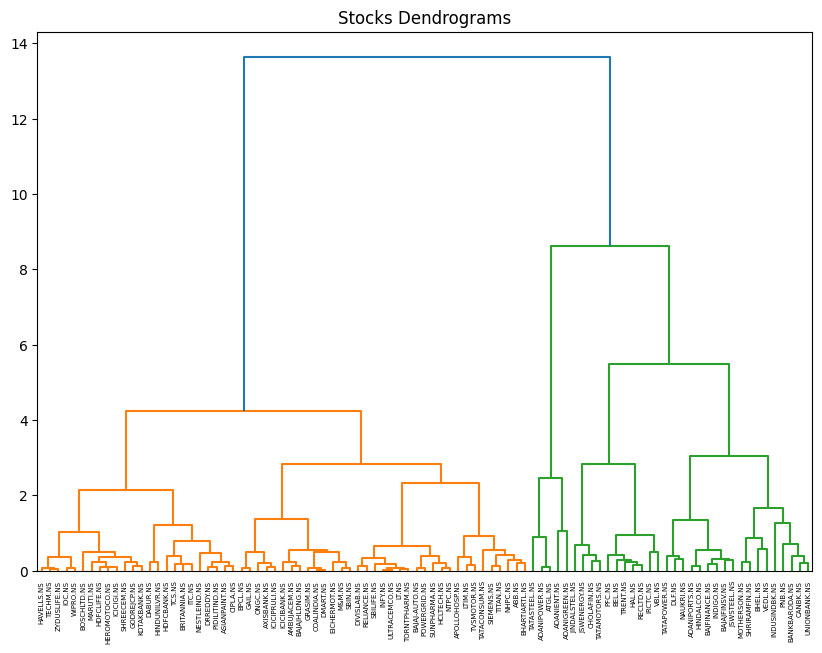

In [69]:
#Plot Dendogram
plt.figure(figsize=(10, 7))
plt.title("Stocks Dendrograms")
dendrogram(Z,labels = X.index)
plt.show()

In [71]:
from scipy.cluster.hierarchy import fcluster

distance_threshold = 13
clusters = fcluster(Z, distance_threshold, criterion='distance')
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster'])
chosen_clusters['cluster'].unique()

array([1, 2])

### 2.2.2 Clustering and visualisation

In [74]:
from sklearn.cluster import AgglomerativeClustering

nclust = 4
hc = AgglomerativeClustering(n_clusters=nclust, linkage='ward')
clust_labels1 = hc.fit_predict(X)

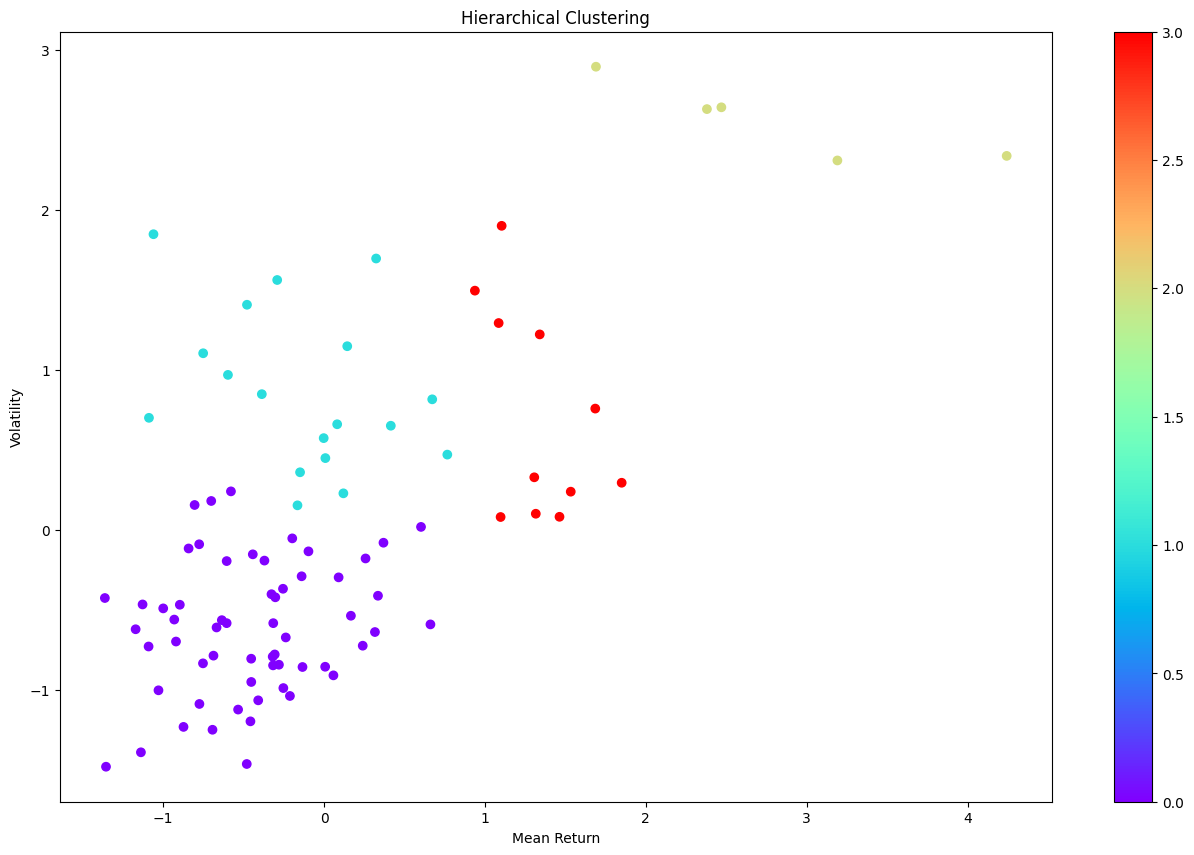

In [75]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels1, cmap ="rainbow")
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

## 2.3 Affinity Propagation

In [77]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(X)
clust_labels2 = ap.predict(X)

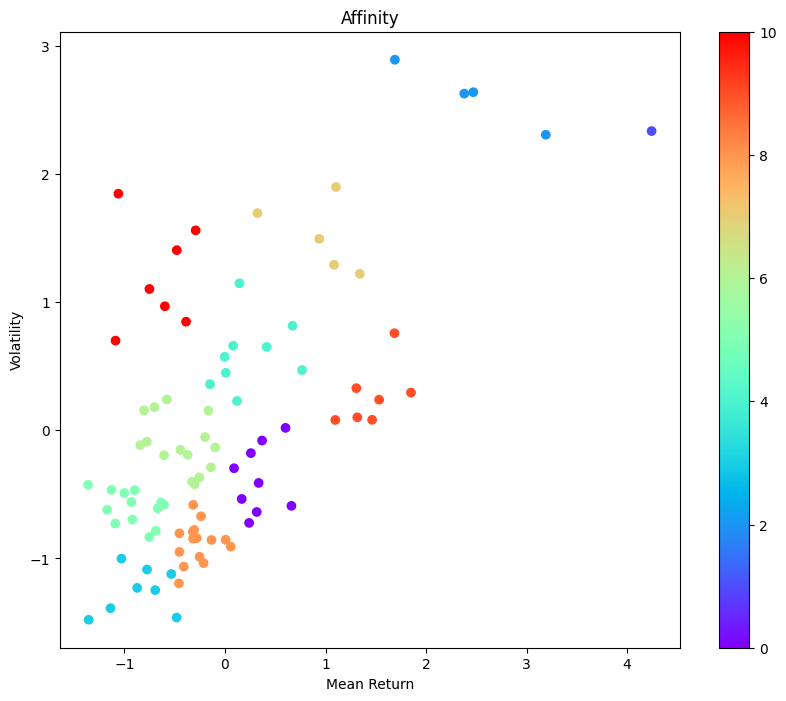

In [78]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels2, cmap ="rainbow")
ax.set_title('Affinity')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

### 2.3.1 Clustering and visualisation

In [79]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

Estimated number of clusters: 11


<Figure size 640x480 with 0 Axes>

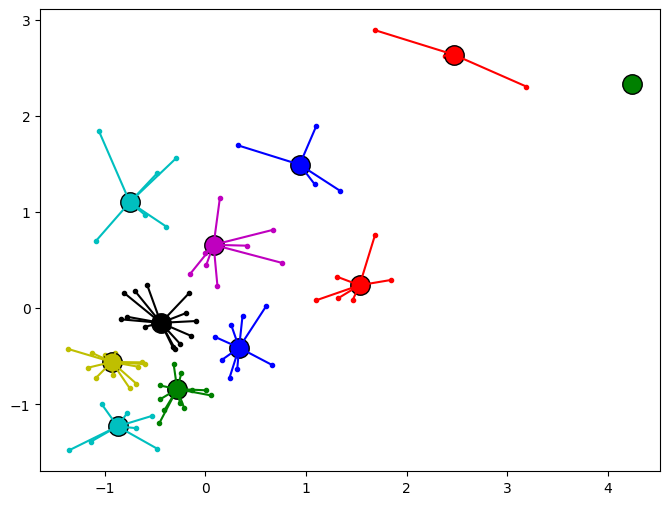

In [81]:
from itertools import cycle

no_clusters = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % no_clusters)
# Plot exemplars

X_temp=np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(8,6))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(no_clusters), colors):
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

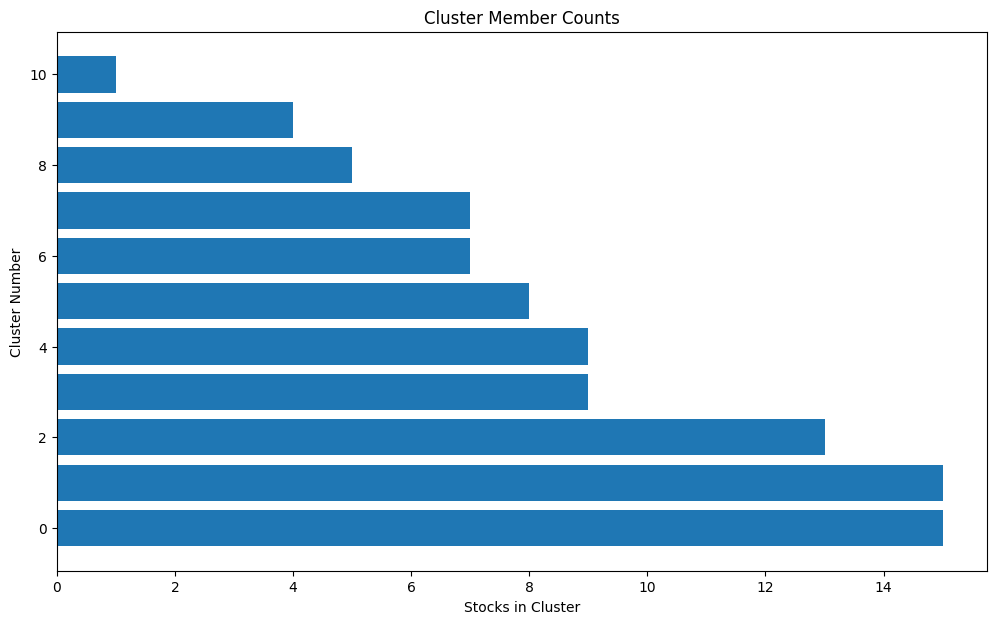

In [82]:
# show number of stocks in each cluster
clustered_series_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
# clustered stock with its cluster label
clustered_series_all_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series_ap.value_counts())), # cluster labels, y axis
    clustered_series_ap.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

## 2.4 Cluster Evaluation

The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

In [83]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("hc", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.35093883031439466
hc 0.46022399276824877
ap 0.40737640074075654


### Visualising returns within a cluster

In [84]:
# all stock with its cluster label (including -1)
clustered_series = pd.Series(index=X.index, data=ap.fit_predict(X).flatten())
# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=ap.fit_predict(X).flatten())
clustered_series = clustered_series[clustered_series != -1]

In [85]:
# get the number of stocks in each cluster
counts = clustered_series_ap.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<25) & (counts>1)].index)[::-1]
cluster_vis_list

[2, 7, 9, 10, 3, 4, 0, 5, 8, 6]

In [86]:
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 10
Pairs to evaluate: 892


In [87]:
# plot a handful of the smallest clusters
plt.figure(figsize=(12,7))
cluster_vis_list[0:min(len(cluster_vis_list), 4)]

[2, 7, 9, 10]

<Figure size 1200x700 with 0 Axes>

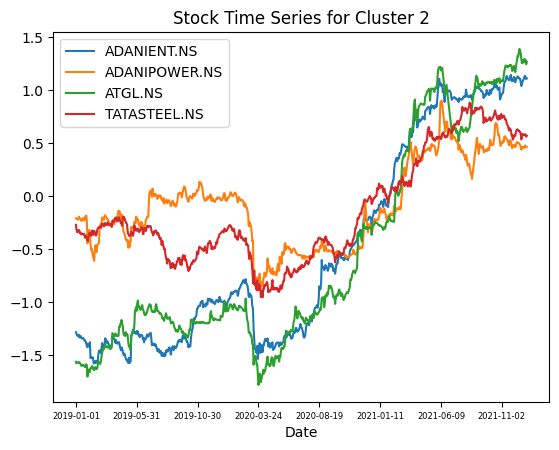

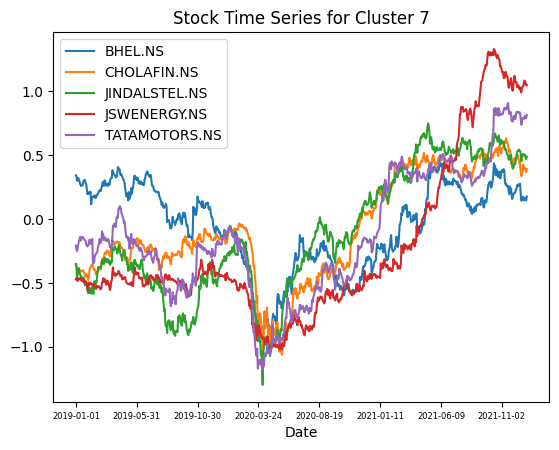

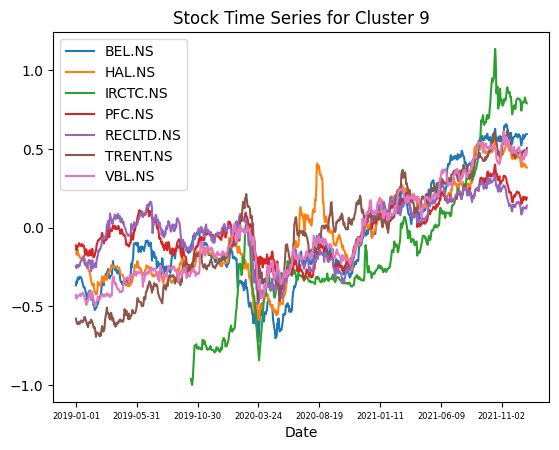

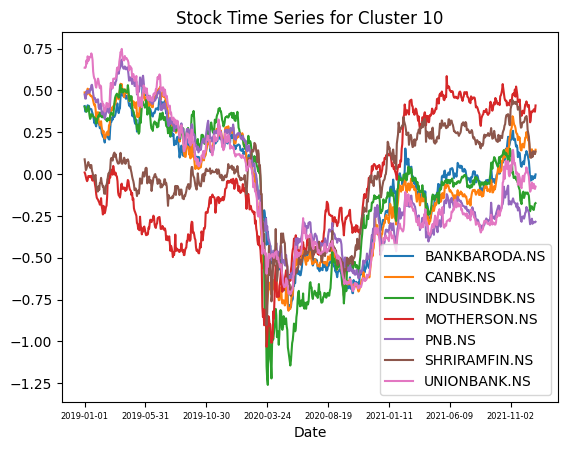

In [101]:
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 4)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(dataset.loc[:"2022-01-01", tickers].mean())
    data = np.log(dataset.loc[:"2022-01-01", tickers]).sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % clust)
    plt.xticks(fontsize=6) 
plt.show()



## 3. Pairs Selection

### 3.1 Cointegration and Pair Selection

In [102]:
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [104]:
from statsmodels.tsa.stattools import coint
import numpy as np

# Function to replace NaN and infinite values with the mean of the column
def clean_data(data):
    # Replace NaN with the mean of each column
    data = data.fillna(data.mean())
    
    # Replace infinite values with NaN, then fill NaN with the mean
    data = data.replace([np.inf, -np.inf], np.nan)
    data = data.fillna(data.mean())
    
    return data

cluster_dict = {}

for i, which_clust in enumerate(ticker_count_reduced.index):
    # Get tickers for the current cluster
    tickers = clustered_series[clustered_series == which_clust].index   
    
    # Clean the dataset by replacing NaN and inf values
    cleaned_data = clean_data(dataset[tickers])
    
    # Find cointegrated pairs for the cleaned data
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(cleaned_data)
    
    # Store the results in the cluster_dict
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs


In [105]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [106]:
print ("Number of pairs found : %d" % len(pairs))
print ("In those pairs, there are %d unique tickers." % len(np.unique(pairs)))

Number of pairs found : 7
In those pairs, there are 12 unique tickers.


In [107]:
pairs

[('AMBUJACEM.NS', 'EICHERMOT.NS'),
 ('ASIANPAINT.NS', 'INFY.NS'),
 ('BOSCHLTD.NS', 'IOC.NS'),
 ('ABB.NS', 'NHPC.NS'),
 ('ADANIPORTS.NS', 'BAJFINANCE.NS'),
 ('ADANIPORTS.NS', 'HINDALCO.NS'),
 ('ADANIPORTS.NS', 'JSWSTEEL.NS')]

### 3.2 Pair Visualisation

In [108]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
stocks = np.unique(pairs)
X_df = pd.DataFrame(index=X.index, data=X).T

In [109]:
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.T.loc[stocks]

In [110]:
X_tsne = TSNE(learning_rate=50, perplexity=3, random_state=1337).fit_transform(X_pairs)

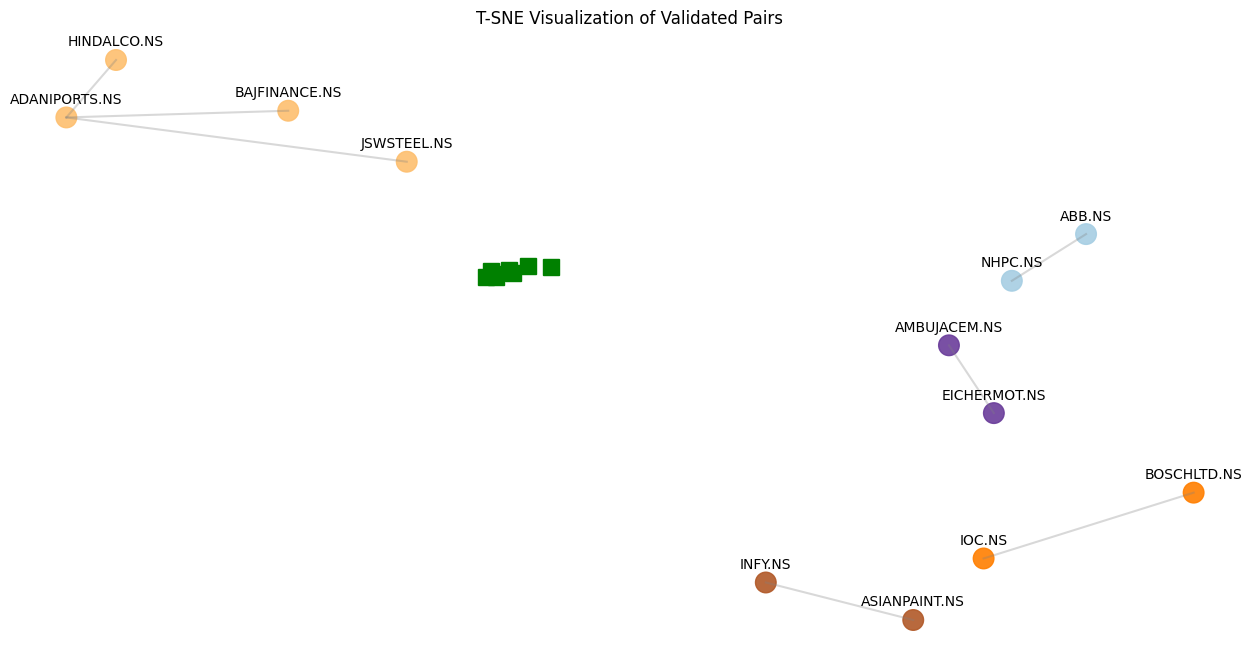

In [111]:
plt.figure(1, facecolor='white',figsize=(16,8))
plt.clf()
plt.axis('off')
for pair in pairs:
    #print(pair[0])
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    #print(ticker1, loc1)

    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
      
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='gray');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=220, alpha=0.9, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('T-SNE Visualization of Validated Pairs'); 

# zip joins x and y coordinates in pairs
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

## Conclusion
The clustering techniques do not directly help in stock trend prediction. However, they can be effectively used in portfolio construction for finding the right pairs, which eventually help in risk mitigation and one can achieve superior risk adjusted returns.

We showed the approaches to finding the appropriate number of clusters in k-means and built a hierarchy graph in hierarchical clustering. A next step from this case study would be to explore and backtest various long/short trading strategies with pairs of stocks from the groupings of stocks.

Clustering can effectively be used for dividing stocks into groups with “similar characteristics” for many other kinds of trading strategies and can help in portfolio construction to ensure we choose a universe of stocks with sufficient diversification between them.
The hierarchical classification seemed to work best for NIFTY 100 stocks.